# Keras

Keras is a high level API for tensorflow. It has scikit-learn integration and was built around deep learning concepts, so it is very easy to construct the layers and implement the optimization functions.

The objective here is to set the same neural network used in Tensorflow low-level API for the MNIST data set, but this time with keras.

In [10]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Load MNIST dataset

In [11]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Convert the data into Keras/TensorFlow format

In [12]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Divide the image data by 255 to normalize 

In [13]:
train_images /= 255
test_images /= 255

# One-hot encode the labels

In [14]:
y_train = keras.utils.to_categorical(mnist_train_labels, 10)
y_test = keras.utils.to_categorical(mnist_test_labels, 10)

# Same visualization of training images

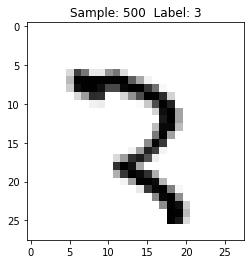

In [21]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the label
    label = y_train[num].argmax(axis=0)
    #Reshape to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(500)

# Neural network in Keras

It is straightforward, and building the same as the low level API:
- The input layer of 784 features feeds into a ReLU layer of 784 nodes
- This layer feeds into another ReLU layer of 512 nodes
- The 512 nodes layer goes into 10 nodes with softmax applied

In [30]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Summary of the model

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
_________________________________________________________________


# Optimizer and loss function

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Training the model

10 epochs with a batch size of 100. Keras is slower and this can take some of time.

In [33]:
history = model.fit(train_images, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, y_test))

Epoch 1/10
600/600 - 12s - loss: 0.2249 - accuracy: 0.9306 - val_loss: 0.1340 - val_accuracy: 0.9584
Epoch 2/10
600/600 - 13s - loss: 0.0975 - accuracy: 0.9711 - val_loss: 0.0871 - val_accuracy: 0.9766
Epoch 3/10
600/600 - 11s - loss: 0.0731 - accuracy: 0.9785 - val_loss: 0.0795 - val_accuracy: 0.9772
Epoch 4/10
600/600 - 11s - loss: 0.0588 - accuracy: 0.9829 - val_loss: 0.0779 - val_accuracy: 0.9796
Epoch 5/10
600/600 - 11s - loss: 0.0501 - accuracy: 0.9857 - val_loss: 0.0972 - val_accuracy: 0.9774
Epoch 6/10
600/600 - 11s - loss: 0.0472 - accuracy: 0.9871 - val_loss: 0.0829 - val_accuracy: 0.9818
Epoch 7/10
600/600 - 11s - loss: 0.0440 - accuracy: 0.9882 - val_loss: 0.1020 - val_accuracy: 0.9814
Epoch 8/10
600/600 - 11s - loss: 0.0372 - accuracy: 0.9901 - val_loss: 0.0967 - val_accuracy: 0.9835
Epoch 9/10
600/600 - 11s - loss: 0.0358 - accuracy: 0.9902 - val_loss: 0.0955 - val_accuracy: 0.9835
Epoch 10/10
600/600 - 11s - loss: 0.0327 - accuracy: 0.9911 - val_loss: 0.1091 - val_accura

In [34]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10906815528869629
Test accuracy: 0.9824000000953674


Even with just 10 epochs, it outperformed Tensorflow version - **96% (low level API) vs 98% (Kera)**

# Visualize the wrong ones

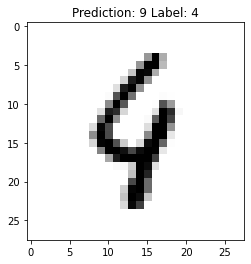

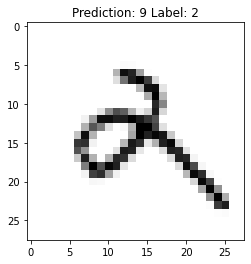

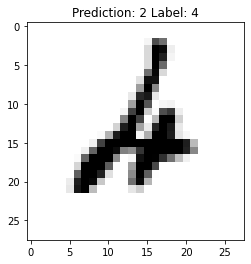

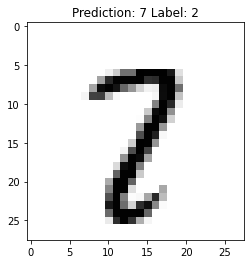

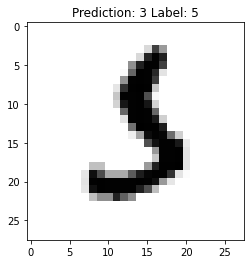

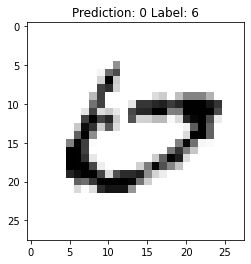

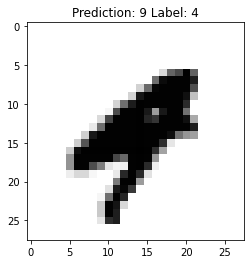

In [35]:
for x in range(500):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()